In [1]:
# Notes on the numerical solution of DEs

# Example 2: Two coupled odes ;  Initial Value Problem (IVP); 
# This script illustrates the basic numerical integration of a problem involving coupled growth and decay
# A solution is marched forward in time from an initial condition defined at time t = 0.
# As with the single ODE example, a critical issue in problems like this is the choice of time step: the step must be sufficiently small to resolve the structure of the solution Y(t).
# A CASE structure is used so that different choices of time step might be investigated easily. Please compare the results.
# Is the "best" choice of time step always the smallet one possible?  How might you define "best" in a practical sense?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#decay constant
Lambda = 0.75 #note: capital 'L' used because 'lambda' is a built-in python function already

#initial Y
y0 = 1

#initial time
t0 = 0

#max integration time
tmax = 50

[0.1        0.01778279 0.00316228 0.00056234 0.0001    ]


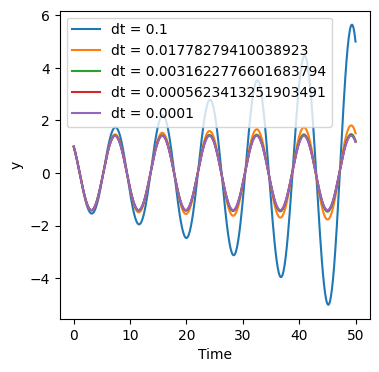

In [10]:
#recursion relation for radioactive decay: y_n+1 = y_n - Lambda*y_n*delta

#investigate influence of time step on solution
dts = [1.0, 0.5, 0.1, 0.01, 0.001] #time steps to investigate
dts = np.logspace(-1,-4,5)
print(dts)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))

for jj, dt in enumerate(dts): #jj tracks index, dt is the time step of each loop
    
    #initialize
    steps = int(np.round(tmax/dt))
    y = np.empty((steps+1,))
    yy = np.empty((steps+1,))
    t = np.empty((steps+1,))
    y[0] = y0
    yy[0] = y0
    t[0] = t0
    
    #march forward in time
    for step in range(steps):
        y[step+1] = y[step] + yy[step]*Lambda*dt
        yy[step+1] = yy[step] - y[step]*Lambda*dt
        t[step+1] = t[step] + dt  
        
    ax.plot(t,yy, label = 'dt = ' + str(dt))
    
ax.set_xlabel('Time')
ax.set_ylabel('y')
ax.legend()

plt.show()

# My work

Analytical solution gives
$$y_1=C_1\cos(\lambda t)+C_2\sin(\lambda t),\quad y_2=-C_1\sin(\lambda t)+C_2\cos(\lambda t)$$
Using $y_1(0)=y_2(0)=y_0$ gives $C_1=C_2=y_0$

In [22]:
# note this assumes t0=0. If this is not the case then the assumption C1=C2=y0 is no longer valid
def exact_solution(t, y0, lam):
    y1 = y0*np.cos(lam*t) + y0*np.sin(lam*t)
    y2 = -y0*np.sin(lam*t) + y0*np.cos(lam*t)
    return y1, y2

def rmse(y_pred, y_exact):
    return np.sqrt((y_pred - y_exact)**2)

def pred_solution(y0, t0, tmax, dt, Lambda):
    #initialize
    steps = int(np.round(tmax/dt))
    y = np.empty((steps+1,))
    yy = np.empty((steps+1,))
    t = np.empty((steps+1,))
    y[0] = y0
    yy[0] = y0
    t[0] = t0
    
    #march forward in time
    for step in range(steps):
        y[step+1] = y[step] + yy[step]*Lambda*dt
        yy[step+1] = yy[step] - y[step]*Lambda*dt
        t[step+1] = t[step] + dt

    return y, yy, t 

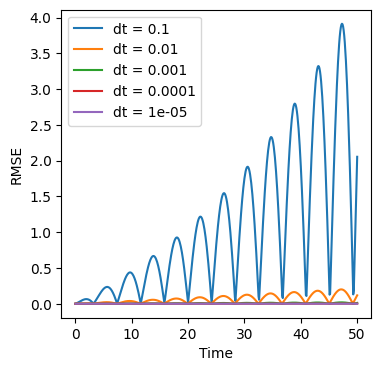

In [24]:
dts = np.logspace(-1,-5,5)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))

for jj, dt in enumerate(dts):
    y_pred, yy_pred, t = pred_solution(y0, t0, tmax, dt, Lambda)
    y_exact, yy_exact = exact_solution(t, y0, Lambda)
    error = rmse(y_pred, y_exact)

    ax.plot(t,error, label = 'dt = ' + str(dt))
    
ax.set_xlabel('Time')
ax.set_ylabel('RMSE')
ax.legend()

plt.show()

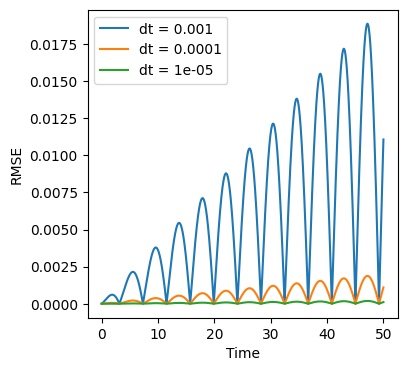

In [26]:
dts = np.logspace(-3,-5,3)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4))

for jj, dt in enumerate(dts):
    y_pred, yy_pred, t = pred_solution(y0, t0, tmax, dt, Lambda)
    y_exact, yy_exact = exact_solution(t, y0, Lambda)
    error = rmse(y_pred, y_exact)

    ax.plot(t,error, label = 'dt = ' + str(dt))
    
ax.set_xlabel('Time')
ax.set_ylabel('RMSE')
ax.legend()

plt.show()

In [ ]:
#Define a function for the 4th order Runge-Kutta integration method and the ODEs to be solved. 

def rk4(fxy, x0, xf, y0, N):
    
    # The inputs to the function are:
    #         fxy = the name of the function containing f(x,y) (e.g. oneode, twoode)
    #         xo,xf = initial and final values of the independent variable (integers or floats)
    #         yo = initial value of dependent variable at xo (numpy array)
    #         N = number of intervals to use between xo and xf (integer)

    # The outputs to the function are:
    #         X = numpy array containing values of the independent variable
    #         Y = the estimated dependent variable at each value of the independent variable
    #         --> this variable is a 1D numpy array if only one equation is solved
    #         --> it is an M-D numpy array [y1(x) y2(x) ... ] for multiple (M) equations 

    #compute step size and size of output variables
    if N < 2:
        N = 2 #set minimum number for N
    h = (xf - x0) / N
    X = np.zeros((N+1, 1))
    M = np.max(np.shape(y0))
    Y = np.zeros((N+1, M))*1j #make complex by multiplying by 1j; this way can add complex values to this during integration

    #set initial conditions
    x = x0
    X[0] = x
    y = [complex(val) for val in y0]  #make complex
    Y[0,:] = y
    
    #begin computational loop
    for ii in range(N):
        
        k1 = np.array([h * val for val in fxy(x,y)]) #evaluate function fxy; depending on equation, k1-4 can be complex; this is why we make Y and y complex as well
        k2 = np.array([h * val for val in fxy(x+h/2, y+k1/2)])
        k3 = np.array([h * val for val in fxy(x+h/2, y+k2/2)])
        k4 = np.array([h * val for val in fxy(x+h, y+k3)])
        
        y += (k1 + 2*k2 + 2*k3 + k4) / 6.
        x += h
        X[ii+1] = x
        Y[ii+1,:] = y
    
    return X, Y

def twoodes(t,y):
    lam = Lambda
    # input:
    #     t: float
    #     y: numpy array with length = number of equations being solved

    # output:
    #     ydot: numpy array of same size as y

    ydot = np.array([lam*y[1], -lam*y[0]]);
    
    return ydot

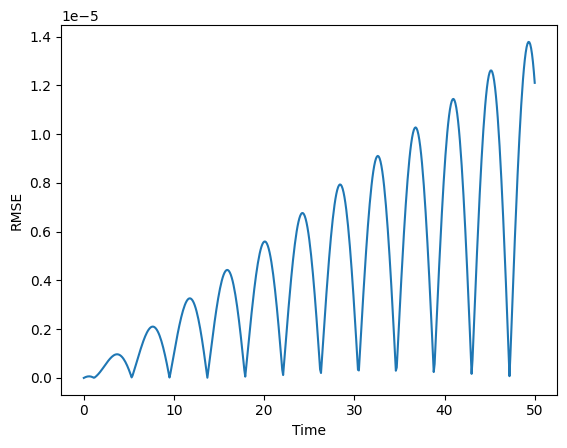

In [62]:
dt = 0.1

t_rk, y_rk = rk4(twoodes, t0, tmax, np.array([y0,y0]), int((tmax-t0)/dt))
y_pred = pred_solution(y0, t0, tmax, dt, Lambda)
y_exact = exact_solution(t_rk, y0, Lambda)

plt.plot(t_rk, rmse(np.real(y_rk[:,0]), y_exact[0][:,0]))
# plt.plot(t_rk, np.real(y_rk[:,0]))
# plt.plot(t_rk, y_exact[0][:,0])
plt.ylabel('RMSE')
plt.xlabel('Time')
plt.show()

In [53]:
np.real(y_rk[:,0]).shape

(5001,)

In [57]:
y_exact[0][:,0].shape

(5001,)

In [47]:
rmse(y_rk[:,0], y_exact[0])

array([[0.00000000e+00+0.j, 7.47180482e-03+0.j, 1.48869396e-02+0.j, ...,
        2.35314142e-01-0.j, 2.26413394e-01-0.j, 2.17556160e-01-0.j],
       [7.47180482e-03-0.j, 1.97619698e-13-0.j, 7.41513480e-03+0.j, ...,
        2.42785947e-01-0.j, 2.33885199e-01-0.j, 2.25027965e-01-0.j],
       [1.48869396e-02-0.j, 7.41513480e-03-0.j, 3.92130772e-13-0.j, ...,
        2.50201082e-01-0.j, 2.41300334e-01-0.j, 2.32443100e-01-0.j],
       ...,
       [2.35314141e-01+0.j, 2.42785946e-01+0.j, 2.50201081e-01+0.j, ...,
        1.17928289e-09-0.j, 8.90074697e-03+0.j, 1.77579811e-02+0.j],
       [2.26413393e-01+0.j, 2.33885198e-01+0.j, 2.41300333e-01+0.j, ...,
        8.90074932e-03-0.j, 1.17387777e-09-0.j, 8.85723293e-03+0.j],
       [2.17556159e-01+0.j, 2.25027964e-01+0.j, 2.32443098e-01+0.j, ...,
        1.77579834e-02-0.j, 8.85723528e-03-0.j, 1.16839616e-09-0.j]])